In [36]:
import helpsk as hlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import seaborn as sns

%matplotlib inline

# Load Data

In [2]:
#https://www.openml.org/d/31
credit_g = fetch_openml('credit-g', version=1)
credit_data = credit_g['data']
credit_data.shape

(1000, 20)

## Create Missing Values

In [8]:
credit_data['duration'].iloc[0:10] = np.nan
credit_data['checking_status'].iloc[5:15] = np.nan

# Summary

In [9]:
hlp.pandas.numeric_summary(credit_data)

,# of Non-Nulls,# of Nulls,% Nulls,# of Zeros,% Zeros,Mean,St Dev.,Coef of Var,Skewness,Kurtosis,Min,10%,25%,50%,75%,90%,Max
duration,990,10,0.01,0,0.0,20.841,12.031,0.577,1.110,0.975,4.0,9.0,12.0,18.0,24.00,36.0,72.0
credit_amount,1000,0,0.00,0,0.0,3271.258,2822.737,0.863,1.950,4.293,250.0,932.0,1365.5,2319.5,3972.25,7179.4,18424.0
installment_commitment,1000,0,0.00,0,0.0,2.973,1.119,0.376,-0.531,-1.210,1.0,1.0,2.0,3.0,4.00,4.0,4.0
residence_since,1000,0,0.00,0,0.0,2.845,1.104,0.388,-0.273,-1.381,1.0,1.0,2.0,3.0,4.00,4.0,4.0
age,1000,0,0.00,0,0.0,35.546,11.375,0.320,1.021,0.596,19.0,23.0,27.0,33.0,42.00,52.0,75.0
existing_credits,1000,0,0.00,0,0.0,1.407,0.578,0.411,1.273,1.604,1.0,1.0,1.0,1.0,2.00,2.0,4.0
num_dependents,1000,0,0.00,0,0.0,1.155,0.362,0.313,1.909,1.649,1.0,1.0,1.0,1.0,1.00,2.0,2.0


In [10]:
hlp.pandas.non_numeric_summary(credit_data)

,# of Non-Nulls,# of Nulls,% Null,Most Freq. Value,# of Unique,% Unique
checking_status,990,10,0.01,no checking,4,0.004
credit_history,1000,0,0.00,existing paid,5,0.005
purpose,1000,0,0.00,radio/tv,10,0.010
savings_status,1000,0,0.00,<100,5,0.005
employment,1000,0,0.00,1<=X<4,5,0.005
personal_status,1000,0,0.00,male single,4,0.004
other_parties,1000,0,0.00,none,3,0.003
property_magnitude,1000,0,0.00,car,4,0.004
other_payment_plans,1000,0,0.00,none,3,0.003
housing,1000,0,0.00,own,3,0.003


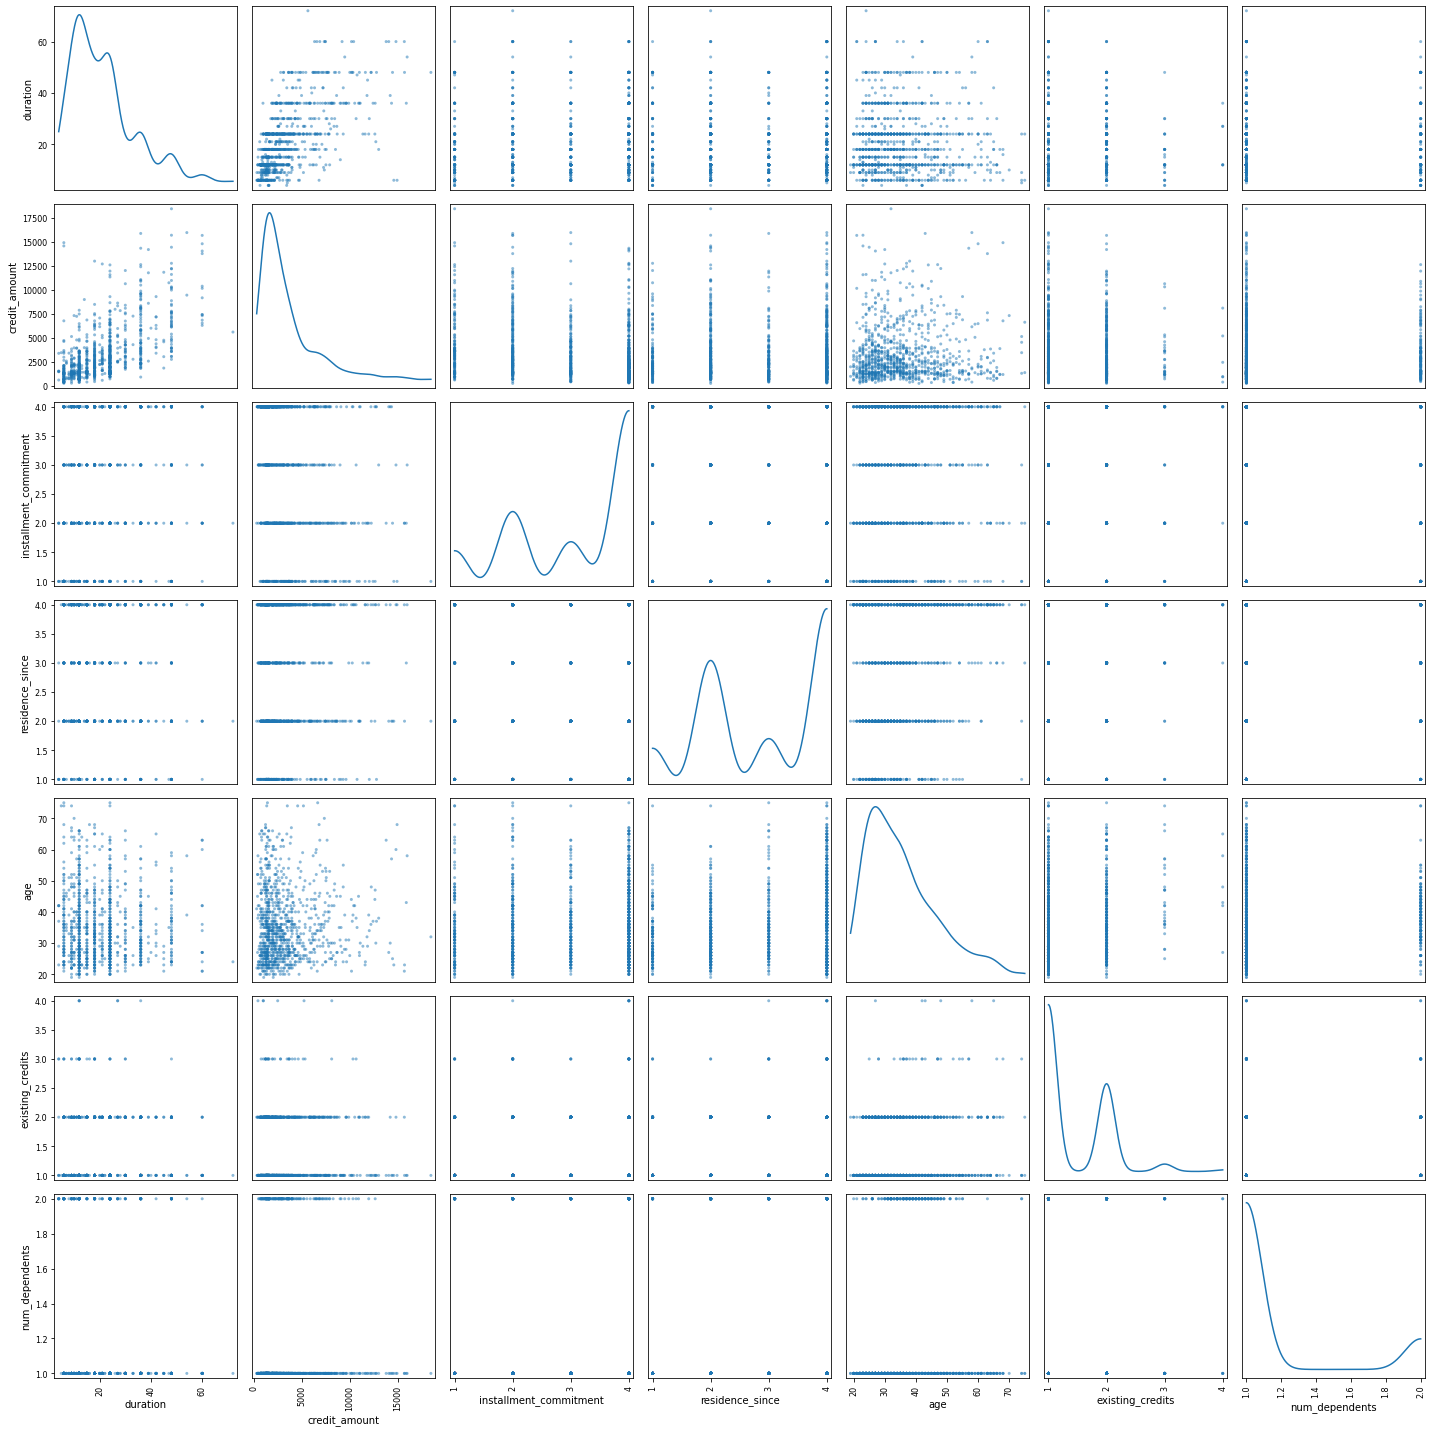

In [15]:
pd.plotting.scatter_matrix(credit_data, figsize=(20, 20), diagonal="kde")
plt.tight_layout()

# Numeric Data

In [12]:
target_column = 'credit_amount'

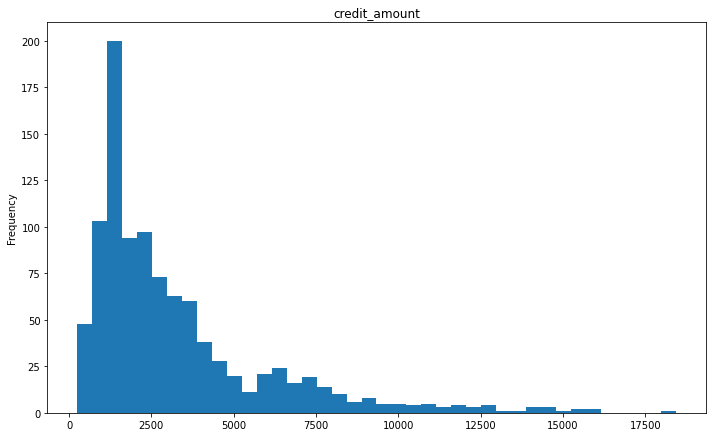

In [13]:
credit_data[target_column].plot.hist(bins=40, figsize=hlp.plot.STANDARD_HEIGHT_WIDTH, title=target_column)
plt.tight_layout()

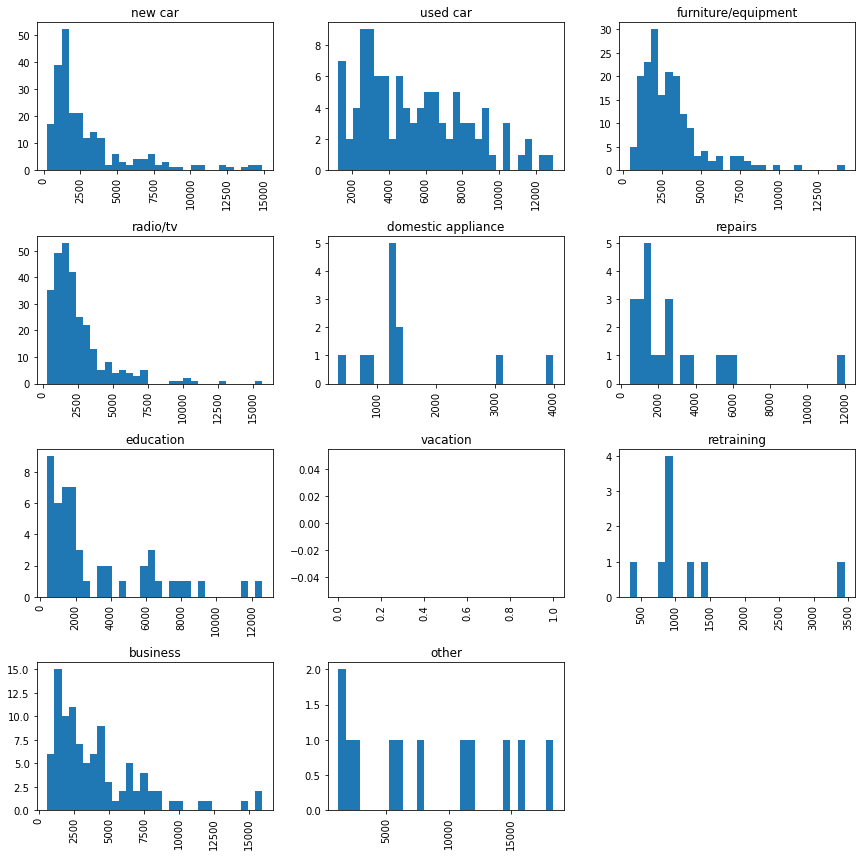

In [16]:
credit_data[target_column].hist(by=credit_data['purpose'], bins=30, figsize=(12, 12))
plt.tight_layout()

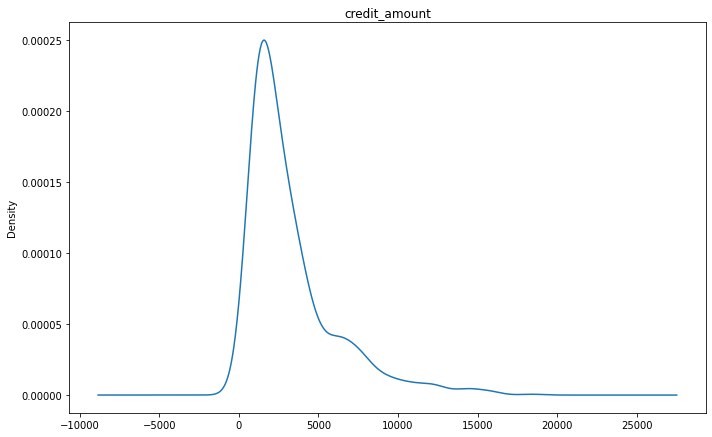

In [17]:
credit_data[target_column].plot.kde(figsize=hlp.plot.STANDARD_HEIGHT_WIDTH, title=target_column)
plt.tight_layout()

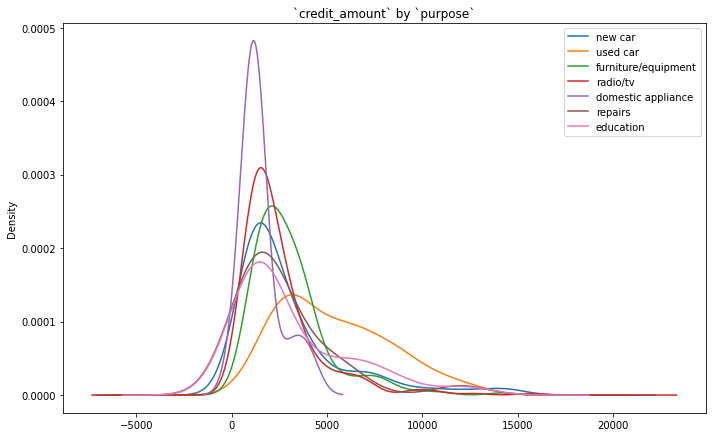

In [30]:
fig, ax = plt.subplots(figsize=hlp.plot.STANDARD_HEIGHT_WIDTH)

try:
    for label, df in credit_data.groupby('purpose'):
        df[target_column].plot(kind="kde", ax=ax, label=label)

except ValueError:
    pass

plt.title(f'`{target_column}` by `purpose`')
plt.legend()
plt.tight_layout()

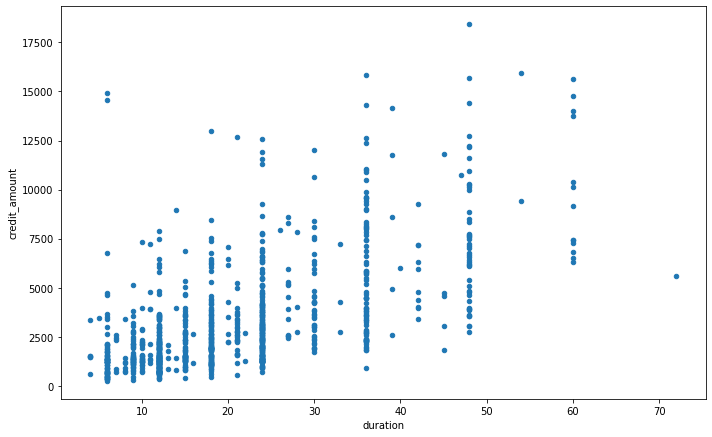

In [34]:
credit_data.plot.scatter(x='duration', y=target_column, figsize=hlp.plot.STANDARD_HEIGHT_WIDTH)
plt.tight_layout()

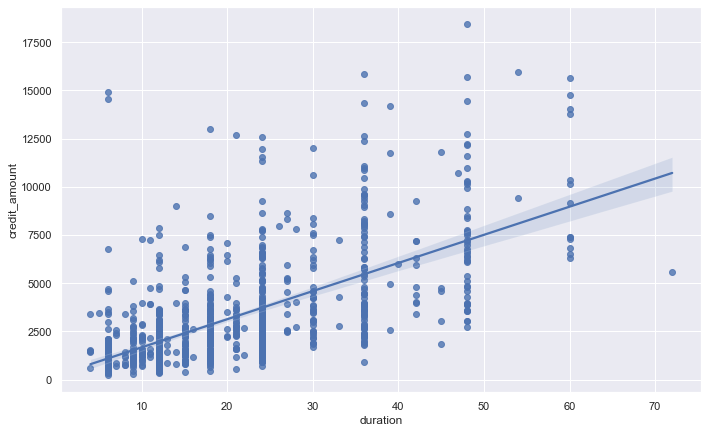

In [58]:
sns.set(rc={'figure.figsize': hlp.plot.STANDARD_HEIGHT_WIDTH})
sns.regplot(x='duration', y=target_column, data=credit_data)
plt.tight_layout()

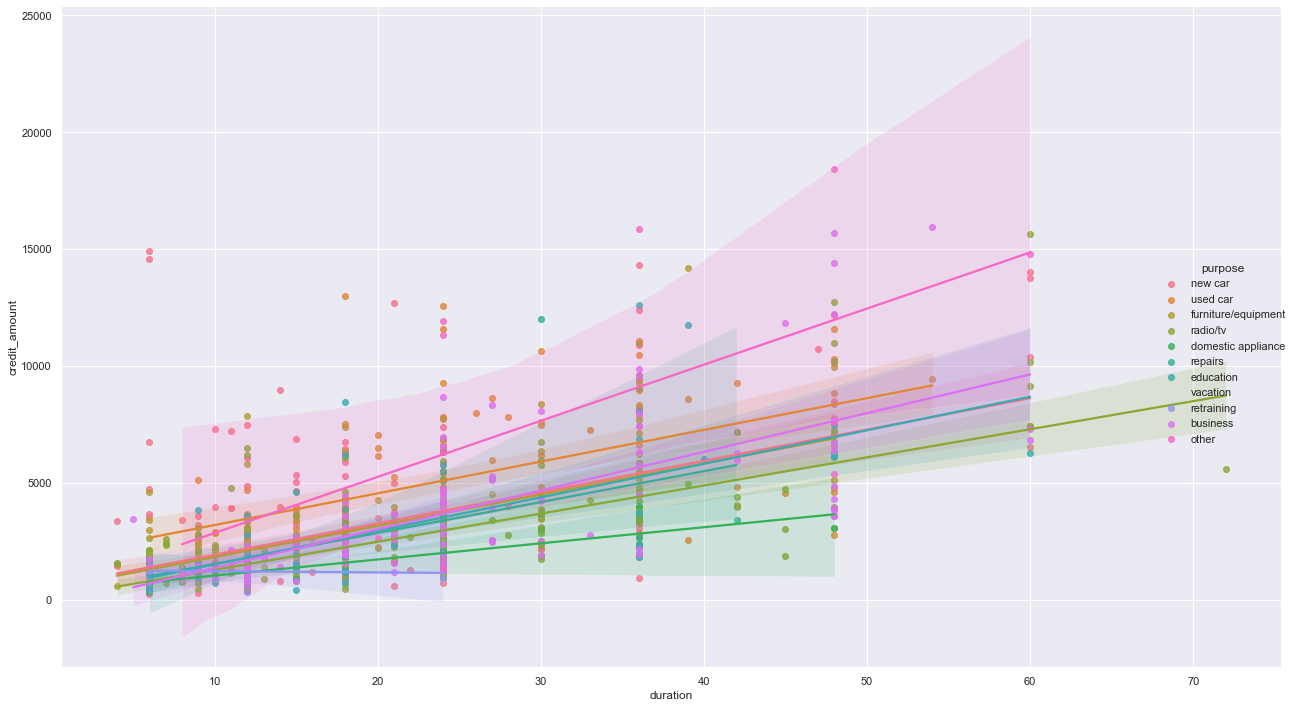

In [70]:
sns.lmplot(x='duration', y=target_column, hue='purpose', data=credit_data, height=10, aspect=hlp.plot.GOLDEN_RATIO)
plt.tight_layout()

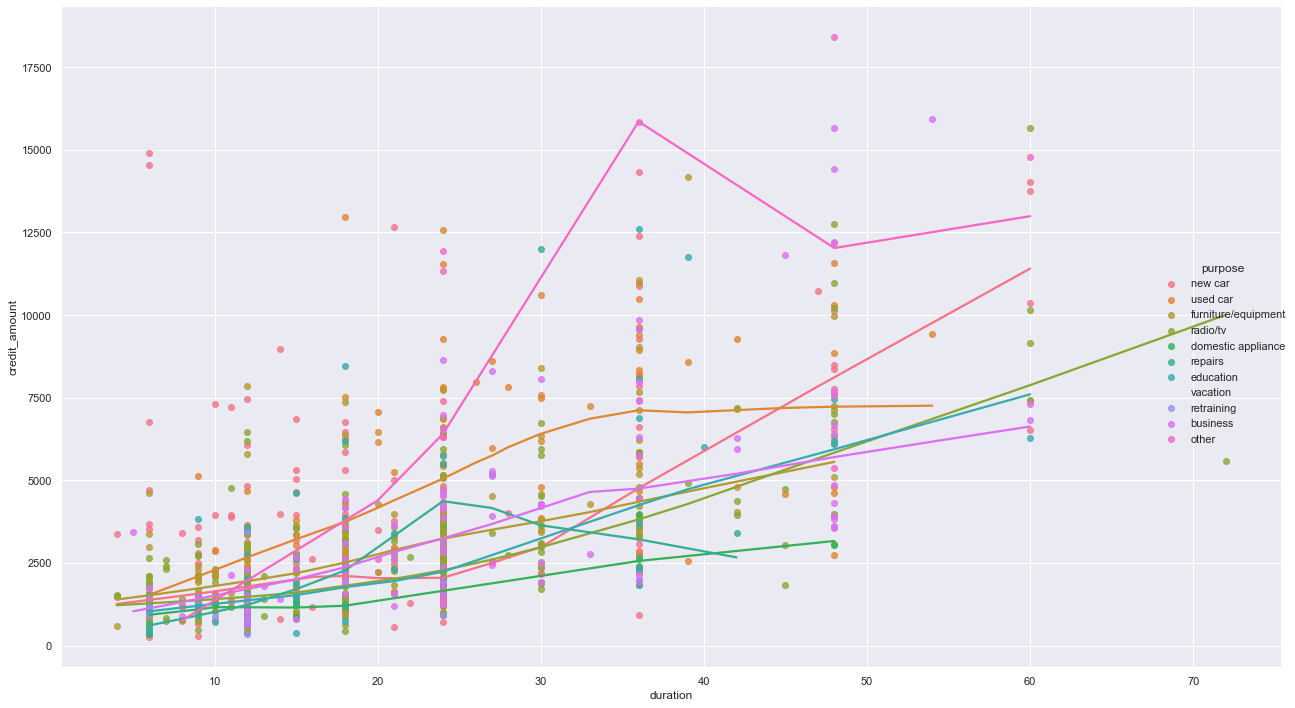

In [75]:
import statsmodels
sns.lmplot(x='duration', y=target_column, hue='purpose', lowess=True, data=credit_data, height=10, aspect=hlp.plot.GOLDEN_RATIO)
plt.tight_layout()

In [32]:
hlp.pandas.value_frequency(credit_data['installment_commitment'], sort_by_frequency=False)

,Frequency,Percent
1.0,136,0.136
2.0,231,0.231
3.0,157,0.157
4.0,476,0.476


In [44]:
[(x * 2) for x in hlp.plot.STANDARD_HEIGHT_WIDTH]

[20, 12.360679774997093]

# Categoric Data

In [ ]:
hlp.pandas.value_frequency(credit_data['purpose'])

In [ ]:
hlp.plot.plot_value_frequency(credit_data['purpose'])